In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])


sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random

In [6]:
nombre_client=50

In [8]:
import copy
# Définition de la fonction de sélection par tournoi
def selection(Couts, taille_tournoi):
    participants = random.sample(Couts.keys(), taille_tournoi) # Sélection de "taille_tournoi" éléments au hasard dans le dictionnaire "Couts"
    return min(participants, key=lambda x:Couts[x] ) # Retourne la clé ayant la plus petite valeur de coût dans "Couts"

# Définition de la fonction de croisement à un point
import random

def croisement(parent1, parent2):
    # Point de croisement aléatoire
    croisement_point = random.randint(1, len(parent1) - 1)

    # Croisement

    enfant1 = copy.deepcopy(parent1[:croisement_point]) +copy.deepcopy(parent2[croisement_point:])
    enfant2 = copy.deepcopy(parent2[:croisement_point]) + copy.deepcopy(parent1[croisement_point:])
    
    # Correction de la répétition des éléments
    enfant_r1 = []
    for element in enfant1 :
        if enfant1.count(element) > 1 and element not in enfant_r1: # Si un élément est répété dans enfant1
            enfant_r1.append(element) # On l'ajoute dans enfant_r1
    enfant_r2 = []
    for element in enfant2 :
        if enfant2.count(element) > 1 and element not in enfant_r2: # Si un élément est répété dans enfant2
            enfant_r2.append(element) # On l'ajoute dans enfant_r2
    
    # Échange de la répétition d'éléments entre les deux enfants
    if len(enfant_r2)!=0:
        for i in range(len(enfant_r2)):
            enfant2[enfant2.index(enfant_r2[i])],enfant1[enfant1.index(enfant_r1[i])] = enfant_r1[i] , enfant_r2[i]
    
    return enfant1, enfant2


# Définition de la fonction de mutation
def mutation(solution, taux_mutation):

    if random.random() < taux_mutation : 

        n = len(solution)
        i = np.random.randint(n)
        j = np.random.randint(n)
        solution[j],solution[i] = solution[i],solution[j] # Échange de la position des éléments i et j dans la solution
    

    return(solution)

def genetique(population, taux_mutation, max_iterations):
    # Initialisation des variables
    history = [] # Historique des meilleurs coûts pour chaque itération
    taille_population = len(population) # Taille de la population
    best_cout = float("inf") # Initialisation du meilleur coût à l'infini
    best_element = None # Initialisation du meilleur élément

    # Boucle principale de l'algorithme génétique
    for i in range(max_iterations):
        # Calcul des coûts pour chaque élément de la population
        Couts = {k: cout(get_route_version2(population[k], time_window, Q)) for k in range(taille_population)}
        
        # Sélection des parents pour la reproduction
        parents = [population[selection(Couts, 2)] for j in range(taille_population)]
        
        # Ajout du meilleur coût de cette itération à l'historique
        history.append(min(list(Couts.values())))
        
        # Reproduction (croisement)
        enfants = []
        for j in range(0, taille_population, 2):
            enfants1, enfants2 = croisement(parents[j], parents[j+1])
            enfants.append(enfants1)
            enfants.append(enfants2)

        # Mutation des enfants
        population = [mutation(enfants[j], taux_mutation) for j in range(taille_population)]
        
        # Mise à jour du meilleur coût et de l'élément associé
        for k in range(taille_population):
            cout_k = cout(get_route_version2(population[k], time_window, Q))
            if cout_k < best_cout:
                best_cout = cout_k
                best_element = population[k]

    return best_element, best_cout, history , population


C:\Users\hicha\AppData\Local\Temp\ipykernel_35756\1960388915.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  participants = random.sample(Couts.keys(), taille_tournoi) # Sélection de "taille_tournoi" éléments au hasard dans le dictionnaire "Couts"


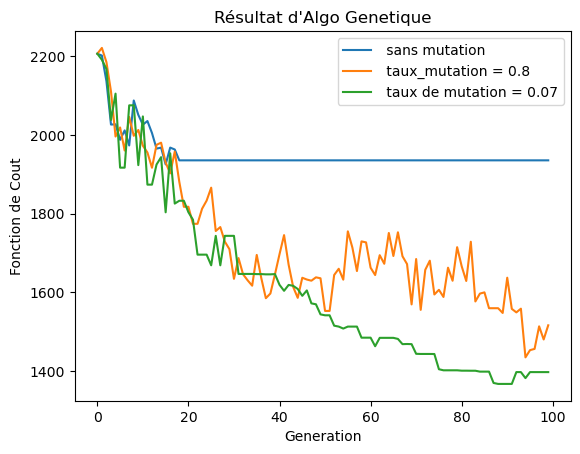

In [9]:
#Exemple d'utilisation
population = []
list_client_initial = [i for i in range(nombre_client)]
for j in range(40): 
    x  = copy.deepcopy(list_client_initial)
    random.shuffle(x)
    population.append(x)



taux_mutation = 0.1
max_iterations = 100
best_element, best_cout, history_taux_mutation_07, population_ = genetique(population, taux_mutation, max_iterations)
 

taux_mutation = 0.8
max_iterations = 100
best_element, best_cout, history_taux_mutation_1, population_ = genetique(population, taux_mutation, max_iterations)
 
 
taux_mutation = 0
max_iterations = 100
best_element, best_cout, history_taux_mutation_0, population_ = genetique(population, taux_mutation, max_iterations)
 
plt.plot(history_taux_mutation_0,label=' sans mutation')
plt.plot(history_taux_mutation_1,label=' taux_mutation = 0.8')
plt.plot(history_taux_mutation_07,label=' taux de mutation = 0.07')
 
plt.legend()

plt.xlabel('Generation')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Genetique")
plt.savefig('Résultats/Algo_Genetique_taux_muatation')

C:\Users\hicha\AppData\Local\Temp\ipykernel_35756\1960388915.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  participants = random.sample(Couts.keys(), taille_tournoi) # Sélection de "taille_tournoi" éléments au hasard dans le dictionnaire "Couts"


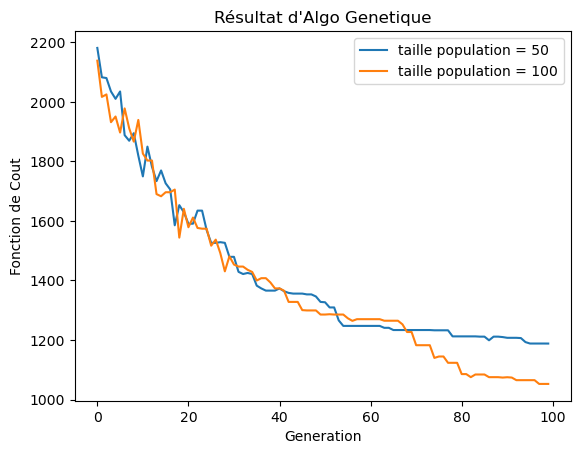

In [10]:
population = []
list_client_initial = [i for i in range(nombre_client)]
for j in range(100): 
    x  = copy.deepcopy(list_client_initial)
    random.shuffle(x)
    population.append(x)



taux_mutation = 0.1
max_iterations = 100
best_element, best_cout, history_taux_mutation_07, population_ = genetique(population[:50], taux_mutation, max_iterations)
 

#taux_mutation = 1
#max_iterations = 100
#best_element, best_cout, history_taux_mutation_1, population_ = genetique(population, taux_mutation, max_iterations)
 
 
taux_mutation = 0.1
max_iterations = 100
best_element, best_cout, history_taux_mutation_0, population_ = genetique(population, taux_mutation, max_iterations)
 

plt.plot(history_taux_mutation_07,label='taille population = 50')
#plt.plot(history_taux_mutation_1,label='taux_mutation = 0.8')
plt.plot(history_taux_mutation_0,label='taille population = 100')
plt.legend()

plt.xlabel('Generation')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Genetique")
plt.savefig('Résultats/Algo_Genetique_taille_population')